<a href="https://colab.research.google.com/github/shonendumm/risk_by_numbers/blob/main/Quantile_Plots_Goodness_of_Fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Compare two sample distributions using quantile-quantile plot.

In [29]:
import numpy as np
# import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot_2samples

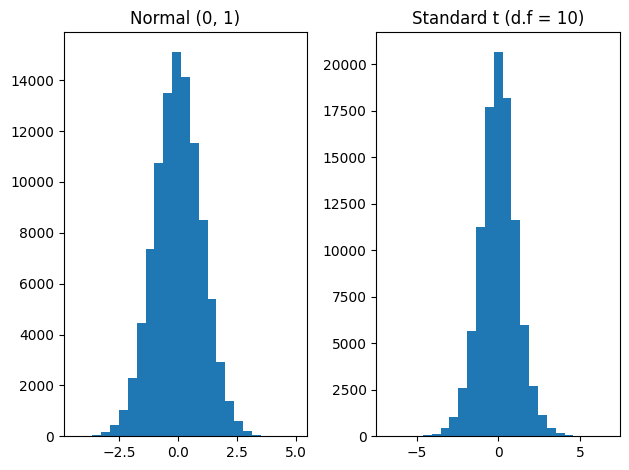

In [34]:
# Create two distributions
n = 100_000
rng = np.random.default_rng(seed=42)

data1 = rng.normal(0, 1, n)
data2 = rng.standard_t(10, n)
# data2 = rng.normal(0, 1, n)

# Let's take a look at the two distributions
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(data1, bins=25)
ax1.set_title("Normal (0, 1)")
ax2.hist(data2, bins=25)
ax2.set_title("Standard t (d.f = 10)")
plt.tight_layout();


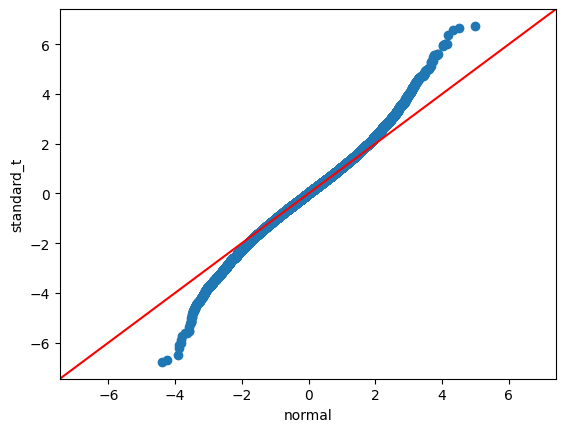

In [35]:
# Let's try a quantile-quantile plot to see how similar are they
qqplot_2samples(data1, data2, xlabel='normal', ylabel='standard_t', line="45");

# The plot diverges from the 45 degree red line, indicating that they are different distributions.

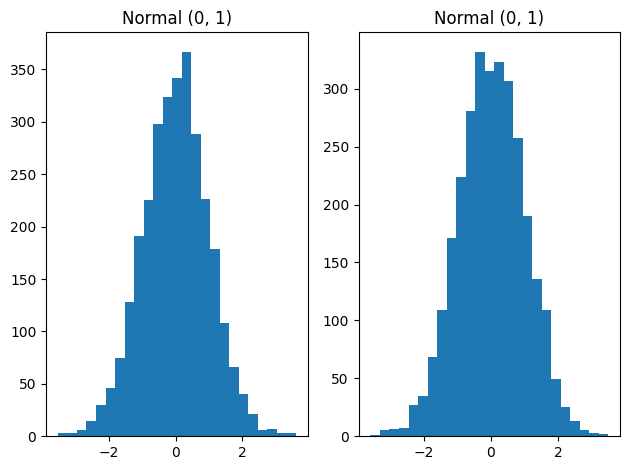

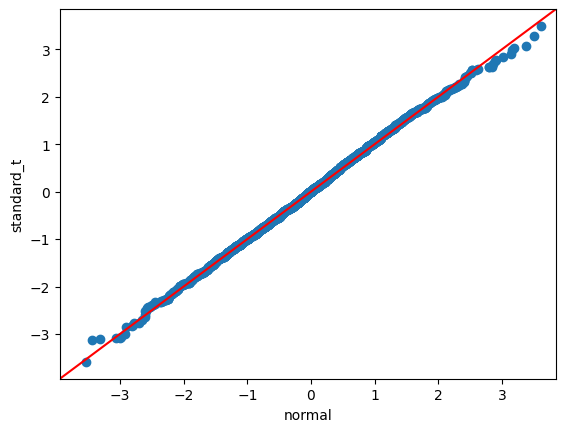

In [45]:
# Try again, this time using same normal distributions

data1 = rng.normal(0, 1, 3000)
data2 = rng.normal(0, 1, 3000)

# Let's take a look at the two distributions
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(data1, bins=25)
ax1.set_title("Normal (0, 1)")
ax2.hist(data2, bins=25)
ax2.set_title("Normal (0, 1)")
plt.tight_layout();

# Let's try a quantile-quantile plot to see how similar are they
qqplot_2samples(data1, data2, xlabel='normal', ylabel='standard_t', line="45");

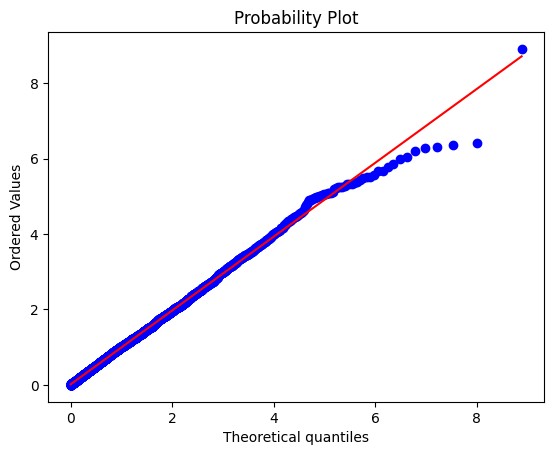

In [75]:
# If we only have 1 sample, and want to compare it with a theoretical distribution
import scipy.stats as ss

data1 = rng.exponential(1, 5000)
fig = plt.subplot()
ss.probplot(data1, dist='expon', fit=True, plot=fig);


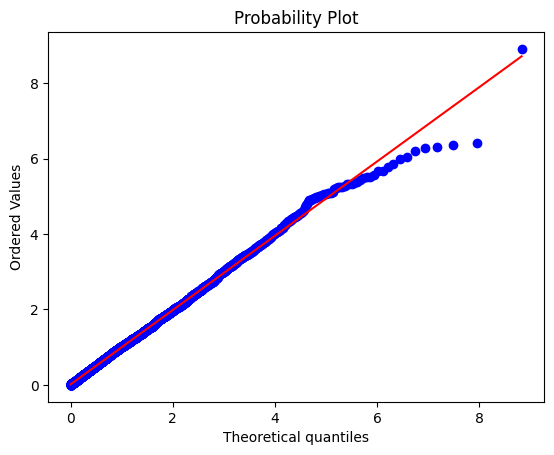

In [77]:
# Fitting method
# data1 = rng.normal(1, 1, 3000)

# Fitting the data to the exponential distribution
fit_params = ss.expon.fit(data1)

# Creating a Q-Q plot with the exponential distribution
fig = plt.subplot()
ss.probplot(data1, dist='expon', sparams=fit_params, plot=fig)
plt.show()